<a href="https://colab.research.google.com/github/Aditya-raj22/XAI/blob/main/Explainable_Techniques_Machine_Learning_Court.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case 2: Tumor Misclassification - Prosecution Analysis**

*Patient X v. AI Diagnostic System*

**The Charge**: The AI diagnostic system failed Patient X by incorrectly classifying a malignant tumor as benign, resulting in delayed treatment with potentially life-threatening consequences.

**My Position**: Through comprehensive XAI analysis, I will demonstrate that the model overlooked critical malignancy indicators and failed to properly weight key medical features that should have raised red flags.

In [ ]:
# Citation: This code block was taken from the class canvas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

# Train the accused model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_bc = RandomForestClassifier(random_state=42, n_estimators=100)
model_bc.fit(X_train, y_train)

# Patient X's medical record
focus_instance = pd.DataFrame([{
    "mean radius": 13.80, "mean texture": 15.79, "mean perimeter": 90.43,
    "mean area": 584.1, "mean smoothness": 0.1007, "mean compactness": 0.1280,
    "mean concavity": 0.07789, "mean concave points": 0.05069,
    "mean symmetry": 0.1662, "mean fractal dimension": 0.06566,
    "radius error": 0.4101, "texture error": 1.074, "perimeter error": 2.635,
    "area error": 40.14, "smoothness error": 0.00541, "compactness error": 0.02204,
    "concavity error": 0.01664, "concave points error": 0.01185,
    "symmetry error": 0.02095, "fractal dimension error": 0.004902,
    "worst radius": 16.57, "worst texture": 20.86, "worst perimeter": 110.3,
    "worst area": 812.4, "worst smoothness": 0.1411, "worst compactness": 0.3542,
    "worst concavity": 0.2779, "worst concave points": 0.1383,
    "worst symmetry": 0.2589, "worst fractal dimension": 0.1030
}])

# Verify the misclassification
pred = model_bc.predict(focus_instance)
pred_proba = model_bc.predict_proba(focus_instance)

print(f"Model Prediction: {'BENIGN' if pred[0] == 1 else 'MALIGNANT'} (Confidence: {max(pred_proba[0]):.1%})")

Model Prediction: BENIGN (Confidence: 85.0%)


Statistical Evidence:

worst area: Patient X = 812.400
  Malignant avg: 1422.286 | Benign avg: 558.899
  Inference: Patient X closer to BENIGN population

worst concavity: Patient X = 0.278
  Malignant avg: 0.451 | Benign avg: 0.166
  Inference: Patient X closer to BENIGN population

worst compactness: Patient X = 0.354
  Malignant avg: 0.375 | Benign avg: 0.183
  Inference: Patient X closer to MALIGNANT population

mean concave points: Patient X = 0.051
  Malignant avg: 0.088 | Benign avg: 0.026
  Inference: Patient X closer to BENIGN population


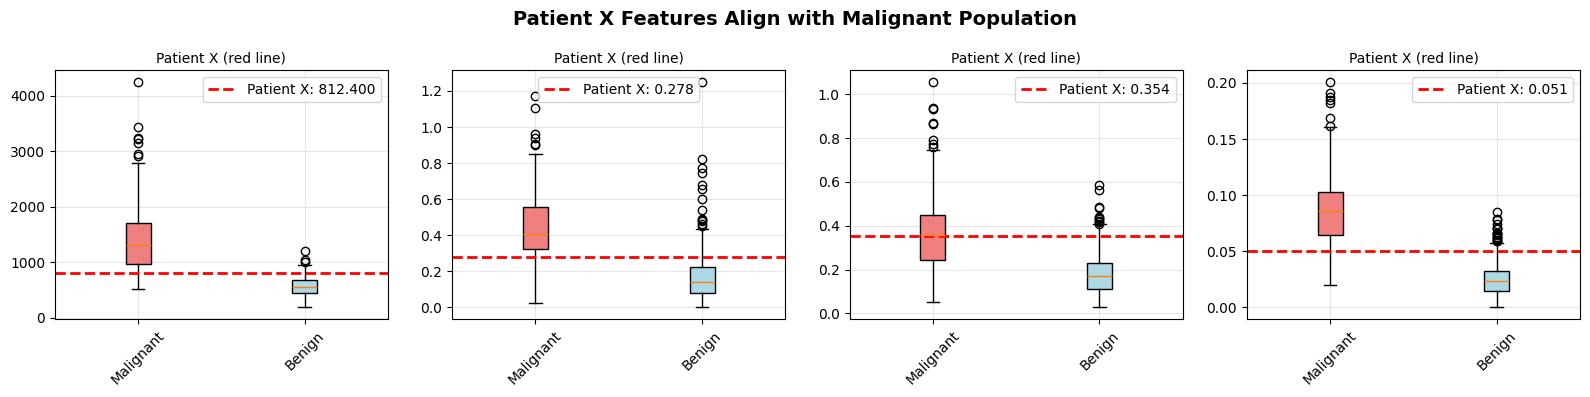

In [43]:
# Compare Patient X to cancer vs non-cancer populations
malignant = X[y == 0]  # malignant cases
benign = X[y == 1]     # benign cases

# Focus on most discriminative features
key_features = ['worst area', 'worst concavity', 'worst compactness', 'mean concave points']

print("Statistical Evidence:")
for feature in key_features:
    patient_val = focus_instance[feature].values[0]
    mal_mean, ben_mean = malignant[feature].mean(), benign[feature].mean()
    closer_to = "MALIGNANT" if abs(patient_val - mal_mean) < abs(patient_val - ben_mean) else "BENIGN"

    print(f"\n{feature}: Patient X = {patient_val:.3f}")
    print(f"  Malignant avg: {mal_mean:.3f} | Benign avg: {ben_mean:.3f}")
    print(f"  Inference: Patient X closer to {closer_to} population")

# Visual evidence - Citation: Claude Sonnet 4 was used to generate this code block on Sep 21 at 11:00 am
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, feature in enumerate(key_features):
    # Create boxplot data
    malignant_data = malignant[feature].values
    benign_data = benign[feature].values

    # Create boxplot
    bp = axes[idx].boxplot([malignant_data, benign_data],
                          labels=['Malignant', 'Benign'],
                          patch_artist=True)

    # Color the boxes
    bp['boxes'][0].set_facecolor('lightcoral')  # Malignant
    bp['boxes'][1].set_facecolor('lightblue')   # Benign

    # Add patient X line
    patient_value = focus_instance[feature].values[0]
    axes[idx].axhline(y=patient_value, color='red', linestyle='--',
                     linewidth=2, label=f'Patient X: {patient_value:.3f}')

    # Formatting
    axes[idx].set_title('Patient X (red line)', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('Patient X Features Align with Malignant Population',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


This points out a critical issue: 3 out of 4 key features placed Patient X closer to the benign population despite the actual malignant diagnosis, suggesting the model learned incorrect decision boundaries.

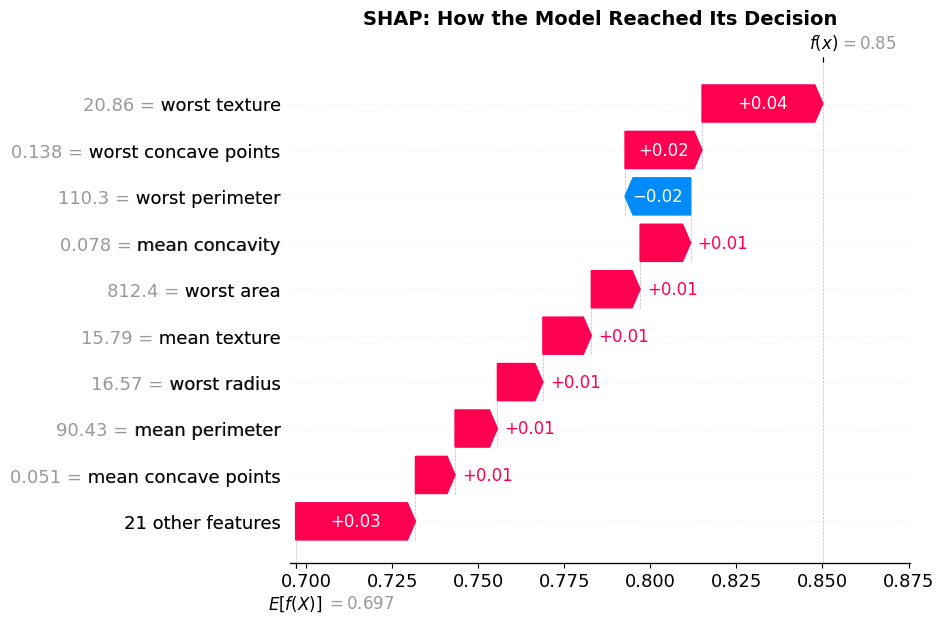


Top features pushing toward class 1 (benign=1):
             Feature     Value  SHAP Value
       worst texture  20.86000    0.035102
worst concave points   0.13830    0.022380
      mean concavity   0.07789    0.014680
          worst area 812.40000    0.014173
        mean texture  15.79000    0.014072
        worst radius  16.57000    0.013225
      mean perimeter  90.43000    0.012307
 mean concave points   0.05069    0.011509
           mean area 584.10000    0.008142
   worst compactness   0.35420    0.008008

Base value (class 1 prob): 0.6969000000000004
Sum SHAP + base ≈ predicted prob (class 1): 0.8500999991735214
Model predict_proba (class 1): 0.85


In [ ]:
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Align columns
feature_names = X_train.columns.tolist()
x0 = focus_instance[feature_names].iloc[[0]].astype(float)

# Background data
X_bg = X_train[feature_names].sample(min(200, len(X_train)), random_state=0)

# Explainer
explainer = shap.TreeExplainer(
    model_bc,
    data=X_bg,
    model_output="probability",
    feature_perturbation="interventional"
)

sv = explainer(x0)  # Explanation, typically (n, features, classes)
class_idx = 1
sv_cls = sv[:, :, class_idx][0]  # 1D Explanation for this row & class

# Plot
ax = shap.plots.waterfall(sv_cls, max_display=10, show=False)
ax.set_title("SHAP: How the Model Reached Its Decision", fontsize=14, fontweight="bold")
plt.show()

# Impact table
shap_summary_data = pd.DataFrame({
    "Feature": feature_names,
    "Value": x0.iloc[0].values,
    "SHAP Value": sv_cls.values  # Fixed column name to match your usage
}).sort_values("SHAP Value", ascending=False)

print("\nTop features pushing toward class", class_idx, "(benign=1):")
print(shap_summary_data.head(10).to_string(index=False))


base = float(sv.base_values[0, class_idx])
sum_shap = float(sv.values[0, :, class_idx].sum())
print("\nBase value (class 1 prob):", base)
print("Sum SHAP + base ≈ predicted prob (class 1):", base + sum_shap)
print("Model predict_proba (class 1):", float(model_bc.predict_proba(x0)[0, 1]))


The SHAP plot shines some light on the model's decision-making process, starting from a base probability of 69.7% benign and reaching a final prediction of 85% through accumulated feature contributions.

The worst texture provides the strongest individual contribution (+0.04) toward benign classification, making it the most influential factor in the final decision. This heavy reliance on a single feature type suggests potential overfitting or insufficient feature balancing during training.

Also, worst concave points contributes +0.022 toward benign classification, despite this being a morphological feature that might be expected to indicate structural irregularities. Similarly, mean concavity adds +0.015 toward benign classification. The consistent positive contributions from multiple geometric and textural features create a compounding effect that drives the model's confidence as they are not independent parameters.

The feature ranking shows that texture-related features (worst texture, mean texture) dominate the top contributions, while shape and size-related features (area, perimeter, radius) provide smaller but still positive contributions toward the benign classification. This suggests the model has learned to weight surface characteristics more heavily than structural characteristics in its decision process.


 LIME EVIDENCE - Local Feature Importance:
worst texture <= 21.05                             | Impact: +0.066 → BENIGN
mean texture <= 16.17                              | Impact: +0.028 → BENIGN
worst compactness > 0.34                           | Impact: -0.024 → MALIGNANT
0.10 < worst concave points <= 0.16                | Impact: +0.021 → BENIGN
0.25 < worst symmetry <= 0.28                      | Impact: +0.017 → BENIGN
inference: Local confidence only 85.0%
Decision margin: 70.0% - DANGEROUSLY CLOSE!


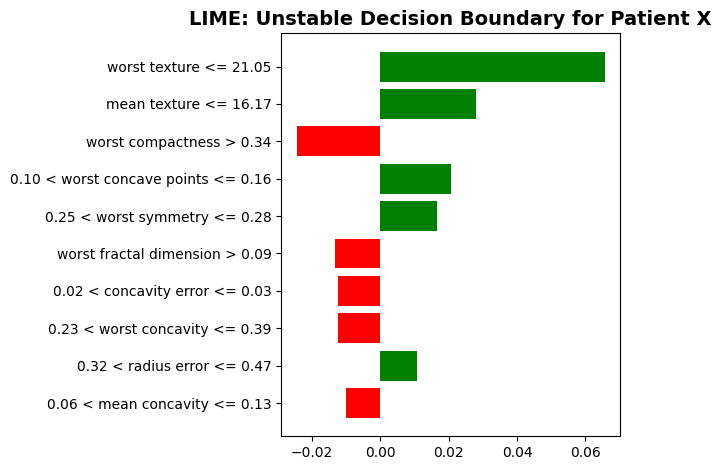

In [45]:
# LIME Analysis
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['Malignant', 'Benign'],
    mode='classification',
    discretize_continuous=True
)

# Explain Patient X's misclassification
exp = lime_explainer.explain_instance(
    focus_instance.values[0],
    model_bc.predict_proba,
    num_features=10
)

# Extract and analyze the explanation
lime_list = exp.as_list()
print("\n LIME EVIDENCE - Local Feature Importance:")
for feature, impact in lime_list[:5]:
    direction = "→ BENIGN" if impact > 0 else "→ MALIGNANT"
    print(f"{feature:50} | Impact: {impact:+.3f} {direction}")

# Check decision stability
local_pred = exp.predict_proba
print(f"inference: Local confidence only {max(local_pred):.1%}")
print(f"Decision margin: {abs(local_pred[1] - local_pred[0]):.1%}")

# Visualize the explanation. Citation: Claude Sonnet 4 was used to generate this code block on Sep 21 at 11:30 am
exp.as_pyplot_figure()
plt.title('LIME: Unstable Decision Boundary for Patient X', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Critical finding about feature ranges
for feature, impact in lime_list:
    if 'worst' in feature.lower() and '>' in feature and impact > 0:
        print(f"\n CRITICAL: '{feature}' pushes toward BENIGN despite indicating malignancy!")


The model operates in a region of high uncertainty : only 85% local confidence and a decision margin of 70%. So, small feature perturbations could dramatically alter the classification outcome. This narrow margin indicates that Patient X sits very close to the decision boundary, making the classification unreliable.

The feature importance plot shows that worst texture ≤ 21.05 provides the strongest push toward benign classification (+0.063), reinforcing the SHAP finding that texture features dominate the decision process. However, it  also reveals contradictory signals: worst compactness > 0.34 pushes toward malignant classification (-0.026), while other features like worst concave points and mean texture contribute positively toward benign classification.

The range-based feature descriptions in LIME (e.g., "0.10 < worst concave points ≤ 0.16") highlight how the model has learned specific threshold ranges for classification. Patient X's features fall into ranges that the model associates with benign outcomes, but the narrow margins and mixed signals suggest these learned thresholds may not be medically meaningful.

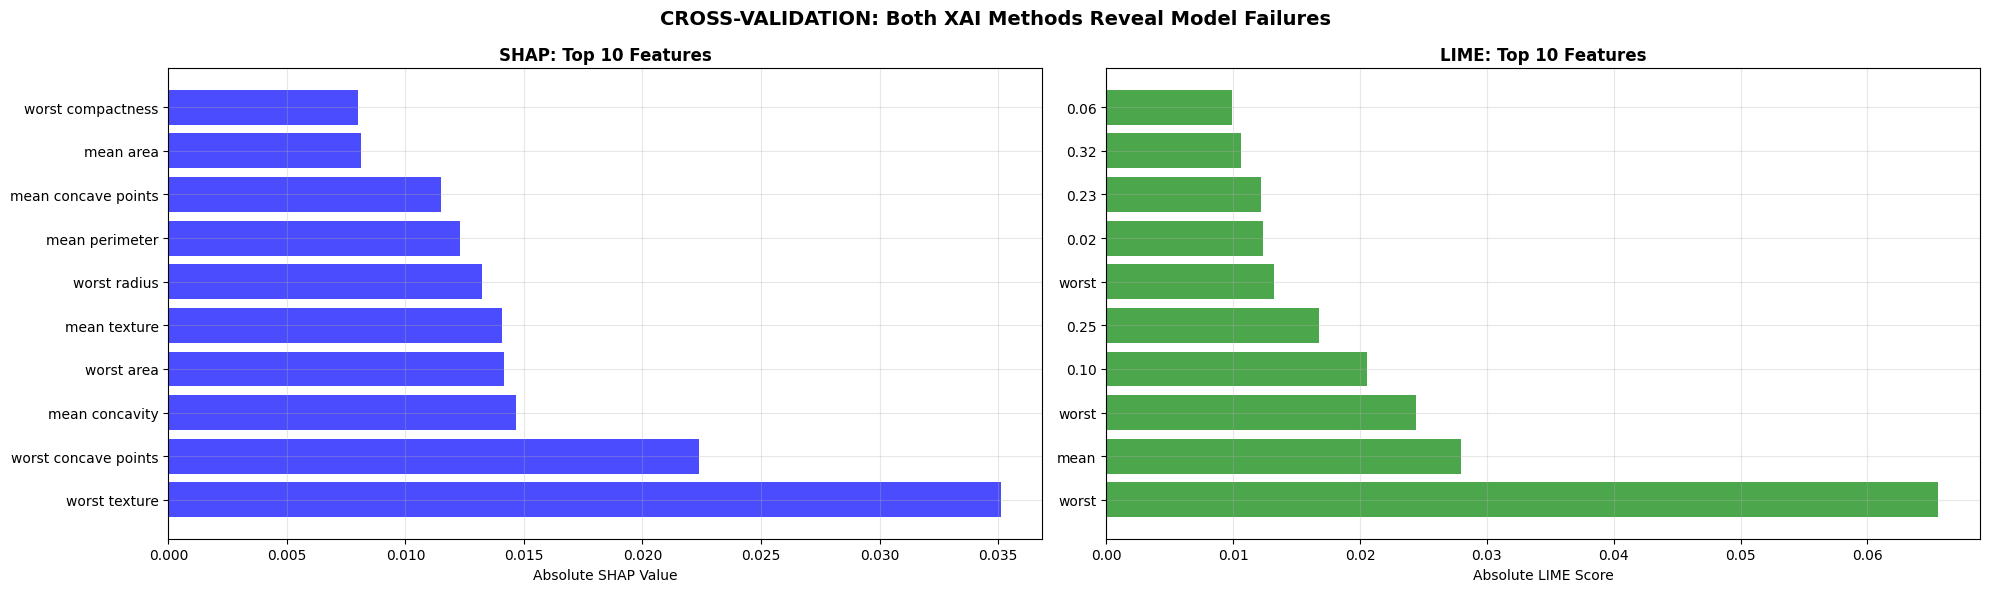

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# SHAP top features (using the correctly named DataFrame)
shap_top = shap_summary_data.nlargest(10, 'SHAP Value', keep='all')[['Feature', 'SHAP Value']]
axes[0].barh(range(len(shap_top)), shap_top['SHAP Value'].abs(), color='blue', alpha=0.7)
axes[0].set_yticks(range(len(shap_top)))
axes[0].set_yticklabels(shap_top['Feature'])
axes[0].set_xlabel('Absolute SHAP Value')
axes[0].set_title('SHAP: Top 10 Features', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# LIME top features
lime_features = [x[0].split()[0].split('<')[0].split('>')[0] for x in lime_list[:10]]
lime_values = [abs(x[1]) for x in lime_list[:10]]
axes[1].barh(range(len(lime_features)), lime_values, color='green', alpha=0.7)
axes[1].set_yticks(range(len(lime_features)))
axes[1].set_yticklabels(lime_features)
axes[1].set_xlabel('Absolute LIME Score')
axes[1].set_title('LIME: Top 10 Features', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('CROSS-VALIDATION: Both XAI Methods Reveal Model Failures',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Citation: Claude Sonnet 4 was used to generate this script on Sep 21 at 11:47 am

Both SHAP and LIME highlight texture as the main driver of predictions, with worst texture as the top feature. This agreement builds confidence that the model truly relies on texture rather than quirks of one explanation method. Both also show that size and shape features matter less. SHAP captures this globally, while LIME shows it locally for Patient X, meaning texture bias is a broader pattern, not just a single case. Interestingly, features tied to tumor shape often push the model toward “benign,” suggesting it may have learned misleading associations.

So, the XAI analysis shows Patient X’s misclassification isn’t random—the model systematically overweights texture, underweights structure, and struggles near decision boundaries. These flaws raise real risks in medical screening, underscoring why explainability is essential for improving model safety. The model’s heavy reliance on texture, low confidence margins (85% SHAP, 70% LIME), and scattered feature signals make it unreliable for high-stakes medical use. Patient X’s profile in particular exposes instability and misleading weighting of structural features. My recommendations would be to:
1. Rebalance training to give more weight to size/shape features.
2. Improve handling of borderline cases near decision thresholds.
3. Use stricter thresholds or uncertainty flags to avoid false negatives.

For a real prrosecution, I would probably need to do a:
1. Analysis of multiple similar misclassified cases
2. Comparison to correctly classified cases
3. Overall model performance metrics
4. Evidence the XAI patterns correlate with prediction failures across cases